# Weather Data Analysis for Seattle From 1948 - 2017

In [1]:
# Global imports
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime as dt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20.0, 16.0]

In [2]:
df = pd.read_csv('./seattle_weather.csv')

In [3]:
df.sample(5)

,DATE,PRCP,TMAX,TMIN,RAIN
15974,1991-09-26,0.00,78,53,False
19626,2001-09-25,0.36,60,55,True
61,1948-03-02,0.00,50,31,False
11002,1978-02-14,0.57,51,37,True
22398,2009-04-28,0.12,54,45,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25551 non-null object
PRCP    25548 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25548 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [5]:
# df.describe()

In [6]:
df.DATE = pd.to_datetime(df.DATE)

In [7]:
df['DAY'] = df.DATE.apply(dt.datetime.isoweekday)
df['DAY_OF_WEEK'] = df.DATE.dt.weekday_name
df['MONTH'] = df.DATE.dt.month
df['YEAR'] = df.DATE.dt.year

In [8]:
df.head(2)

,DATE,PRCP,TMAX,TMIN,RAIN,DAY,DAY_OF_WEEK,MONTH,YEAR
0,1948-01-01,0.47,51,42,True,4,Thursday,1,1948
1,1948-01-02,0.59,45,36,True,5,Friday,1,1948


In [9]:
df.RAIN = df.RAIN.apply(lambda x: 1 if x else 0)

In [10]:
df.head(2)

,DATE,PRCP,TMAX,TMIN,RAIN,DAY,DAY_OF_WEEK,MONTH,YEAR
0,1948-01-01,0.47,51,42,1,4,Thursday,1,1948
1,1948-01-02,0.59,45,36,1,5,Friday,1,1948


### How many in total has it rained vs not in Seattle?

In [11]:
grouped = df.RAIN.groupby(df.RAIN)

In [12]:
series = grouped.count()
series

RAIN
0    14648
1    10903
Name: RAIN, dtype: int64

In [13]:
series.loc[0] / df.RAIN.count()  

0.5732848029431333

In [14]:
rain_by_weekday = df[df['RAIN'] == True]

In [15]:
df[df['PRCP'] > 0.5].RAIN.count()

1525

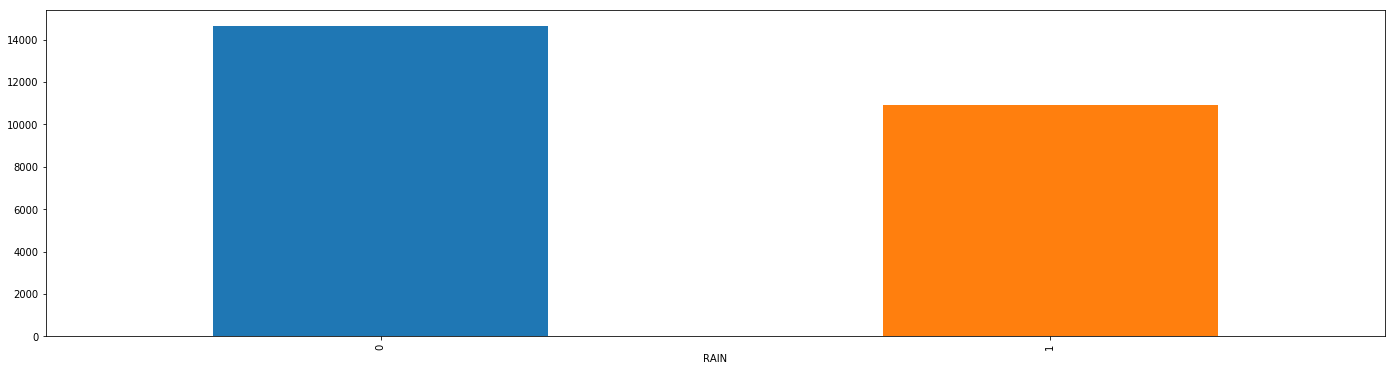

In [22]:
series.plot(kind='bar', figsize=(24.0, 6.0))

In [17]:
rain = df[df.RAIN == True].groupby(df.DAY_OF_WEEK)
rain['DAY_OF_WEEK'].count()

DAY_OF_WEEK
Friday       1559
Monday       1569
Saturday     1584
Sunday       1564
Thursday     1552
Tuesday      1562
Wednesday    1513
Name: DAY_OF_WEEK, dtype: int64

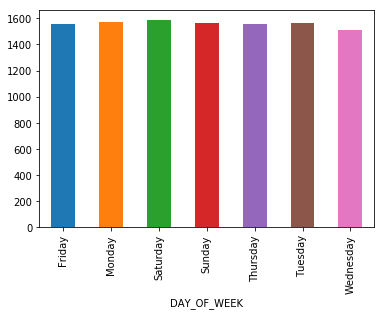

In [18]:
rain['DAY_OF_WEEK'].count().plot(kind='bar')

In [24]:
months_rain = df[df.RAIN == True].groupby(df.MONTH)
months_rain.MONTH.count()

MONTH
1     1298
2     1103
3     1212
4      998
5      771
6      634
7      343
8      413
9      610
10     950
11    1264
12    1307
Name: MONTH, dtype: int64

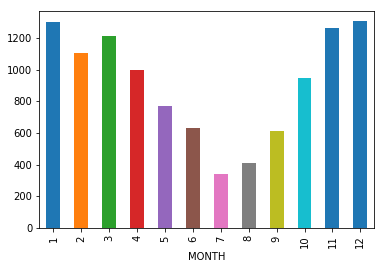

In [25]:
months_rain.MONTH.count().plot(kind='bar')

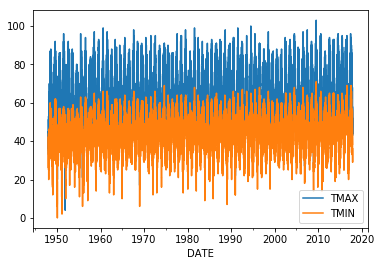

In [36]:
import warnings
warnings.filterwarnings('ignore')

df.plot(x='DATE' , y=['TMAX', 'TMIN'])

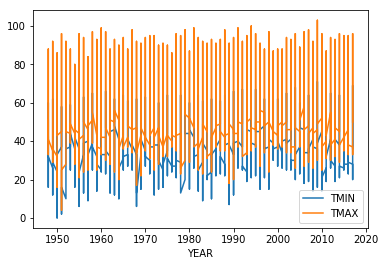

In [37]:
df.plot(x='YEAR', y=['TMIN', 'TMAX'])

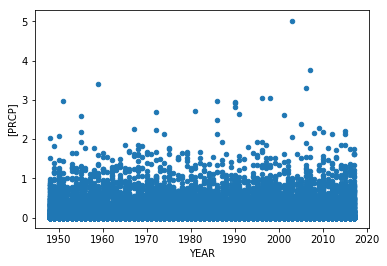

In [35]:
df.plot(x='YEAR' , y=['PRCP'], kind='scatter')

In [41]:
df['AVG_TEMP'] = (df['TMAX'] + df['TMIN']) // 2

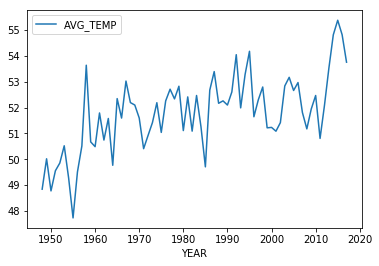

In [46]:
df[['YEAR', 'AVG_TEMP']].groupby('YEAR').mean().plot()

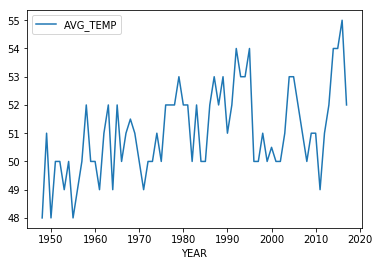

In [47]:
df[['YEAR', 'AVG_TEMP']].groupby('YEAR').median().plot()